# Анализ датасета

Импорт библиотек

In [1]:
import random
import sys

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import pickle
sys.path.append('../../')

from core.datasets import get_ds, open_f

Скачаем трейновый датасет

In [2]:
train_ds = open_f('repaired_data_train', back=2)

#### Посмотрим на гистограмме балансировку классов.

array([3341., 9650., 7595., 5625., 4941., 4604., 3859., 3876., 3332.,
       3177.])

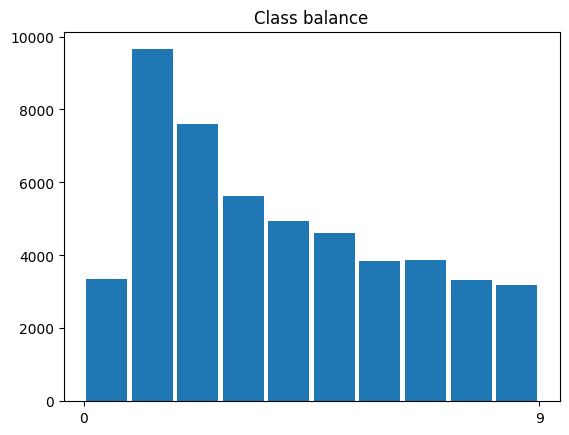

In [3]:
class_cnt = plt.hist(train_ds['labels'], rwidth=0.9)[0]
plt.xticks((0, 9))
plt.title('Class balance')
class_cnt

Как можно заметить, кол-во единиц в датасете сильно больше остальных классов.

Во время обучения это нельзя заметить, потому что примерно в таком же отношении датасет делится на трейновый и валидационный.

----
### Методы борьбы с несбалансировкой классов.
1. 

In [3]:
X_train, y_train = train_ds['images'], train_ds['labels']

In [ ]:
sm = SMOTE(random_state=42)

# X_train_0, y_train_0 = train_ds['images'][train_ds['labels'] == 0], train_ds['labels'][train_ds['labels'] == 0]

train_rows = len(X_train)
X_train = X_train.reshape(train_rows, -1)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_sm = X_train_sm.reshape(-1, 32, 32, 3)
X_train = X_train.reshape(-1, 32, 32, 3)
train_ds['images'], train_ds['labels'] = X_train, y_train

In [6]:
train_ds

{'images': array([[[[ 21,  27,  49],
          [ 18,  20,  44],
          [ 13,  13,  41],
          ...,
          [  0,   4,   6],
          [  0,   4,   4],
          [  0,   4,   3]],
 
         [[ 28,  36,  56],
          [ 26,  32,  56],
          [ 21,  25,  52],
          ...,
          [  1,   5,   8],
          [  0,   4,   4],
          [  0,   3,   2]],
 
         [[ 55,  64,  80],
          [ 54,  61,  81],
          [ 48,  54,  77],
          ...,
          [  1,   5,   8],
          [  0,   4,   5],
          [  1,   5,   4]],
 
         ...,
 
         [[ 55,  47,  57],
          [ 36,  31,  40],
          [ 19,  16,  24],
          ...,
          [  7,   8,   8],
          [  7,   9,   8],
          [  7,   8,   8]],
 
         [[ 18,   8,  22],
          [ 14,   7,  20],
          [  8,   4,  14],
          ...,
          [  8,   8,   7],
          [  8,   8,   8],
          [  7,   7,   7]],
 
         [[ 13,   5,  20],
          [ 14,   7,  20],
          [ 15,  11,

In [7]:
pickle.dump(train_ds, open('../../data/smote_data_train', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

['class_balance.ipynb', 'ConvAndPool', 'ResNet', 'smote_data_train']

In [70]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

adasyn = ADASYN(random_state = 101)
train_rows = len(X_train)
X_train = X_train.reshape(train_rows, -1)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)
X_oversample_ada = X_oversample_ada.reshape(-1, 32, 32, 3)
X_train = X_train.reshape(-1, 32, 32, 3)
# classifier_ada = LogisticRegression()
# classifier_ada.fit(X_oversample_ada, y_oversample_ada)
# print(classification_report(y_test, classifier_ada.predict(X_test)))

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
oversample = RandomOverSampler(sampling_strategy={i: 9650 for i in range(10)})
train_rows = len(X_train)
X_train = X_train.reshape(train_rows, -1)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [82]:
X_over.reshape(-1, 32, 32, 3)
X_train = X_train.reshape(-1, 32, 32, 3)

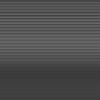

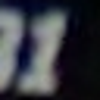

In [86]:
display(Image.fromarray(np.uint8(X_over[50000])).resize((100, 100)))
display(Image.fromarray(np.uint8(X_train[0])).resize((100, 100)))

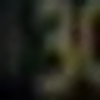

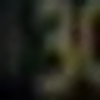

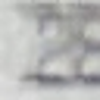

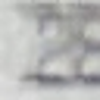

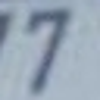

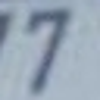

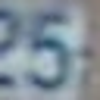

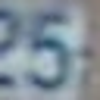

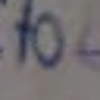

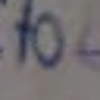

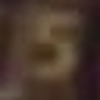

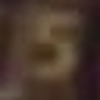

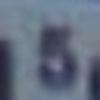

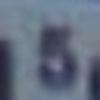

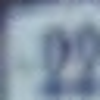

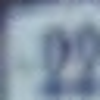

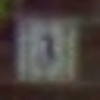

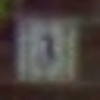

In [64]:
# print(np.all(np.asarray([X_train_sm[i] not in X_train for i in range(50000, 96500 - 1)])))  # проверка на совпадение

for index in range(50000, 50020):
    min_val = 1e9
    min_i = -1
    for i in range(50000):
        if np.sum(np.abs(X_train[i] - X_train_sm[index])) < min_val:
            min_val = np.sum(np.abs(X_train[i] - X_train_sm[index]))
            min_i = i
    display(Image.fromarray(np.uint8(X_train_sm[index])).resize((100, 100)))
    display(Image.fromarray(np.uint8(X_train[min_i])).resize((100, 100)))